# Chapter 4 - Visualization

In [1]:
import pandas as pd
import numpy as np

import mysql.connector
import sys
import boto3
import os
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

### Toxicity Dataset:

In [2]:
ENDPOINT="toxicitydataset.cbowkysg1oyc.us-east-2.rds.amazonaws.com"
PORT="3306"
USR="admin"
DBNAME="toxicity_db_tutorial"
PASSWORD = "xxxxxxxxxxxxxxxxxxxxxxxxxxxx"

In [3]:
from sqlalchemy import create_engine
import pandas as pd

db_connection_str = 'mysql+pymysql://{USR}:{PASSWORD}@{ENDPOINT}:{PORT}/{DBNAME}'.format(USR=USR, PASSWORD=PASSWORD, ENDPOINT=ENDPOINT, PORT=PORT, DBNAME=DBNAME)
db_connection = create_engine(db_connection_str)
df = pd.read_sql('SELECT * FROM dataset_toxicity_sd', con=db_connection)
df.head()

ID                                             smiles  toxic  \
0  25239916  c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...      0   
1  25239917  CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H...      0   
2  25239918  CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)...      0   
3  25239919                 CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-]      0   
4  25239920      CC(C)c1ccc2c(c1)c(=O)c3cc(c(nc3o2)N)C(=O)[O-]      0   

   FormalCharge    TPSA       MolWt  HeavyAtoms  NHOH  HAcceptors  HDonors  \
0            -2   81.65  987.667498          33     0           5        0   
1             1  123.69  407.553000          27     6           7        6   
2             0   92.35  464.831000          32     3           4        3   
3            -1   60.44  250.299000          17     0           4        0   
4            -1  109.25  297.290000          22     2           6        1   

   Heteroatoms  AromaticRings  SaturatedRings  AromaticOH  AromaticN    LogP  
0           13              3               0           0          0  7.4338  
1            9              0               2           4          0 -2.2741  
2           11              3               0           0          1  5.5497  
3            5              2               0           0          0  1.8099  
4            6              3               0           0          1  1.4103

In [4]:
df = pd.read_csv("../../datasets/dataset_toxicity_sd.csv")

In [5]:
df.head()

ID                                             smiles  toxic  \
0  25239916  c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...      0   
1  25239917  CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H...      0   
2  25239918  CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)...      0   
3  25239919                 CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-]      0   
4  25239920      CC(C)c1ccc2c(c1)c(=O)c3cc(c(nc3o2)N)C(=O)[O-]      0   

   FormalCharge    TPSA       MolWt  HeavyAtoms  NHOH  HAcceptors  HDonors  \
0            -2   81.65  987.667498          33     0           5        0   
1             1  123.69  407.553000          27     6           7        6   
2             0   92.35  464.831000          32     3           4        3   
3            -1   60.44  250.299000          17     0           4        0   
4            -1  109.25  297.290000          22     2           6        1   

   Heteroatoms  AromaticRings  SaturatedRings  AromaticOH  AromaticN    LogP  
0           13              3               0           0          0  7.4338  
1            9              0               2           4          0 -2.2741  
2           11              3               0           0          1  5.5497  
3            5              2               0           0          0  1.8099  
4            6              3               0           0          1  1.4103

In [12]:
df[["ID", "smiles", "toxic"]].head()

ID                                             smiles  toxic
0  25239916  c1c2c(c(c(c1[131I])[O-])[131I])Oc3c(cc(c(c3[13...      0
1  25239917  CCC[C@@H]1C[C@H]([NH+](C1)C)C(=O)N[C@@H]([C@@H...      0
2  25239918  CNC(=O)c1cc(ccn1)Oc2ccc(cc2)NC(=O)Nc3ccc(c(c3)...      0
3  25239919                 CN(C)c1cccc2c1ccc(c2)S(=O)(=O)[O-]      0
4  25239920      CC(C)c1ccc2c(c1)c(=O)c3cc(c(nc3o2)N)C(=O)[O-]      0

In [6]:
df.shape

(1460, 16)

In [14]:
df[["toxic", "TPSA", "MolWt", "LogP"]].describe()

toxic         TPSA        MolWt         LogP
count  1460.000000  1460.000000  1460.000000  1460.000000
mean      0.064384    95.362767   382.356525     1.292078
std       0.245519    89.443235   228.985999     3.163150
min       0.000000     0.000000    27.026000   -19.396500
25%       0.000000    44.750000   253.275000    -0.156250
50%       0.000000    75.270000   334.350500     1.550400
75%       0.000000   112.625000   440.557250     3.143200
max       1.000000   833.780000  1882.332000    12.605800

In [7]:
df.describe()

ID        toxic  FormalCharge         TPSA        MolWt  \
count  1.460000e+03  1460.000000   1460.000000  1460.000000  1460.000000   
mean   2.524065e+07     0.064384      0.132192    95.362767   382.356525   
std    4.274412e+02     0.245519      1.094408    89.443235   228.985999   
min    2.523992e+07     0.000000    -10.000000     0.000000    27.026000   
25%    2.524028e+07     0.000000      0.000000    44.750000   253.275000   
50%    2.524066e+07     0.000000      0.000000    75.270000   334.350500   
75%    2.524102e+07     0.000000      1.000000   112.625000   440.557250   
max    2.524139e+07     1.000000      6.000000   833.780000  1882.332000   

        HeavyAtoms         NHOH   HAcceptors      HDonors  Heteroatoms  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     26.087671     2.785616     5.113699     2.226712     7.317808   
std      15.553458     3.680143     4.349937     2.866693     5.854679   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      17.000000     1.000000     2.000000     1.000000     4.000000   
50%      23.000000     2.000000     4.000000     2.000000     6.000000   
75%      31.000000     3.000000     6.000000     3.000000     9.000000   
max     136.000000    28.000000    51.000000    25.000000    67.000000   

       AromaticRings  SaturatedRings   AromaticOH    AromaticN         LogP  
count    1460.000000     1460.000000  1460.000000  1460.000000  1460.000000  
mean        1.427397        0.896575     0.643151     0.659589     1.292078  
std         1.209202        1.267342     1.376659     1.231252     3.163150  
min         0.000000        0.000000     0.000000     0.000000   -19.396500  
25%         0.000000        0.000000     0.000000     0.000000    -0.156250  
50%         1.000000        0.000000     0.000000     0.000000     1.550400  
75%         2.000000        1.000000     1.000000     1.000000     3.143200  
max        10.000000       10.000000    13.000000     8.000000    12.605800

In [8]:
df.isna().sum()

ID                0
smiles            0
toxic             0
FormalCharge      0
TPSA              0
MolWt             0
HeavyAtoms        0
NHOH              0
HAcceptors        0
HDonors           0
Heteroatoms       0
AromaticRings     0
SaturatedRings    0
AromaticOH        0
AromaticN         0
LogP              0
dtype: int64

In [9]:
df.isnull().sum()

ID                0
smiles            0
toxic             0
FormalCharge      0
TPSA              0
MolWt             0
HeavyAtoms        0
NHOH              0
HAcceptors        0
HDonors           0
Heteroatoms       0
AromaticRings     0
SaturatedRings    0
AromaticOH        0
AromaticN         0
LogP              0
dtype: int64

### Bar Plots:

<AxesSubplot:xlabel='FormalCharge', ylabel='TPSA'>

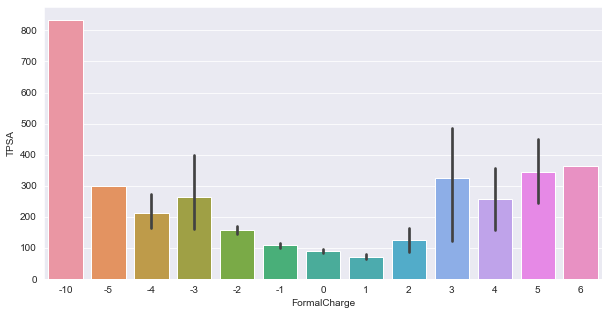

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x="FormalCharge", y="TPSA", data=df)

<AxesSubplot:xlabel='FormalCharge', ylabel='HDonors'>

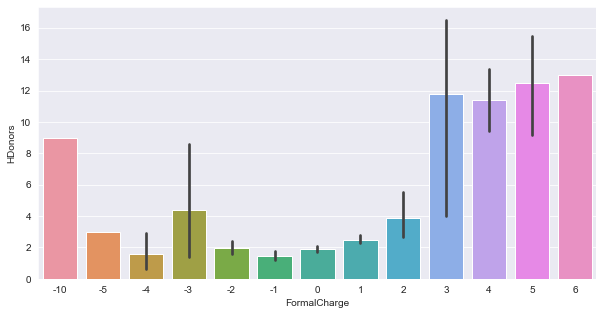

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="FormalCharge", y="HDonors", data=df)

In [12]:
df_iso = df[["FormalCharge", "HDonors", "HAcceptors"]]
print(df_iso.shape)
df_iso.head()

(1460, 3)


FormalCharge  HDonors  HAcceptors
0            -2        0           5
1             1        6           7
2             0        3           4
3            -1        0           4
4            -1        1           6

In [13]:
df_melted = pd.melt(df_iso, id_vars=["FormalCharge"], value_vars=["HDonors", "HAcceptors"])
print(df_melted.shape)
df_melted.head()

(2920, 3)


FormalCharge variable  value
0            -2  HDonors      0
1             1  HDonors      6
2             0  HDonors      3
3            -1  HDonors      0
4            -1  HDonors      1

<AxesSubplot:xlabel='FormalCharge', ylabel='value'>

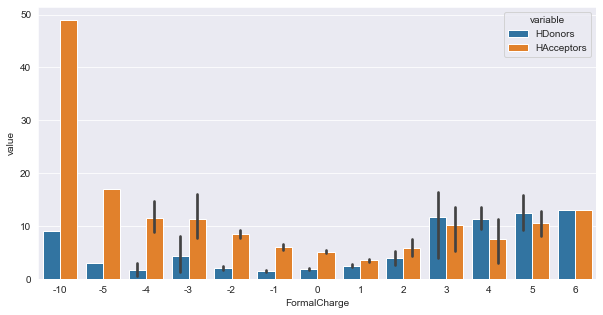

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_melted, x='FormalCharge', y='value', hue='variable')

https://stackoverflow.com/questions/44508049/what-is-this-called-melting-pivoting-reshaping

### Histograms:

<AxesSubplot:title={'center':'Histogram of Molecular Weight (g/mol)'}, xlabel='Molecular Weight (g/mol)', ylabel='Frequency'>

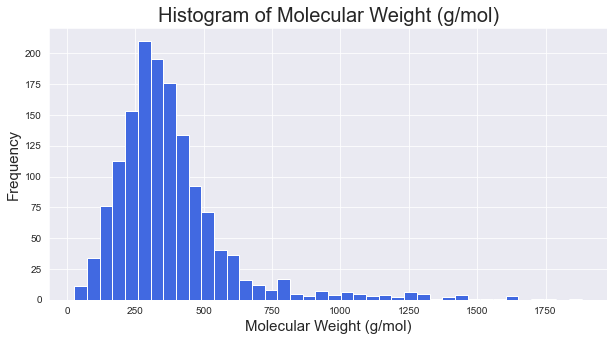

In [15]:
plt.figure(figsize=(10,5))
plt.title("Histogram of Molecular Weight (g/mol)", fontsize=20)
plt.xlabel("Molecular Weight (g/mol)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
df["MolWt"].hist(figsize=(10, 5), 
                          bins=40, 
                          xlabelsize=10, 
                          ylabelsize=10, 
                          color = "royalblue")

<Figure size 720x360 with 0 Axes>

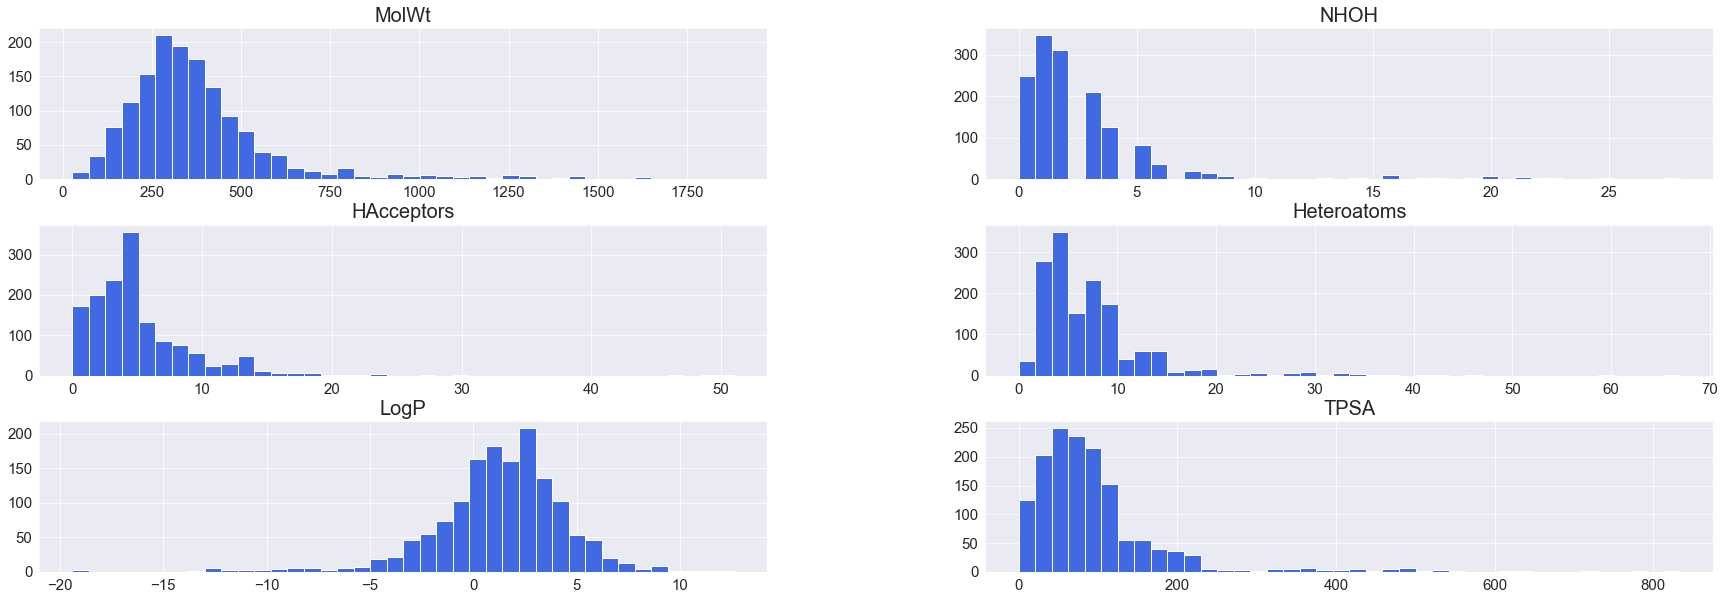

In [16]:
plt.figure(figsize=(10,5))
dftmp = df[["MolWt", "NHOH", "HAcceptors", "Heteroatoms", "LogP", "TPSA"]]
fig = dftmp.hist(figsize=(30, 10), bins=40, xlabelsize=15, ylabelsize=15, color = "royalblue", )
[x.title.set_size(20) for x in fig.ravel()];

In [17]:
df.columns

Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
       'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
       'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
      dtype='object')

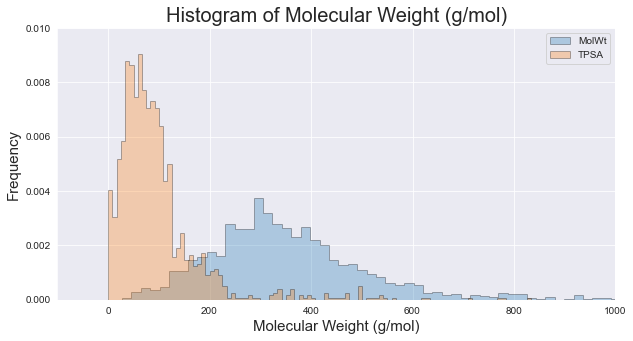

In [18]:
dftmp = df[["MolWt","TPSA"]]

x1 = dftmp.MolWt.values
x2 = dftmp.TPSA.values

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=100, ec="k")

plt.figure(figsize=(10,5))

plt.title("Histogram of Molecular Weight (g/mol)", fontsize=20)
plt.xlabel("Molecular Weight (g/mol)", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xlim([-100, 1000])
plt.ylim([0, 0.01])

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)

plt.legend(dftmp.columns)
plt.show()

### Scatter Plots:

<AxesSubplot:title={'center':'Scatterplot of Heavy Atoms and TPSA'}, xlabel='TPSA', ylabel='Heavy Atoms'>

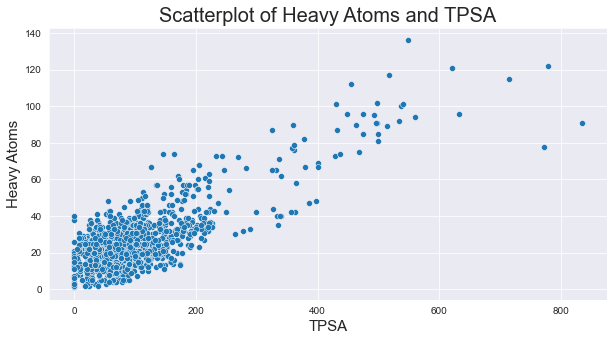

In [19]:
plt.figure(figsize=(10,5))
plt.title("Scatterplot of Heavy Atoms and TPSA", fontsize=20)
plt.ylabel("Heavy Atoms", fontsize=15)
plt.xlabel("TPSA", fontsize=15)
sns.scatterplot(x="TPSA", y="HeavyAtoms", data=df)

<AxesSubplot:title={'center':'Scatterplot of Heavy Atoms and TPSA'}, xlabel='Molecular Weight (g/mol)', ylabel='Heavy Atoms'>

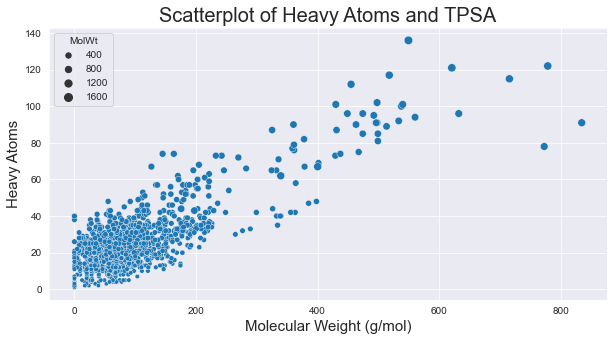

In [20]:
plt.figure(figsize=(10,5))
plt.title("Scatterplot of Heavy Atoms and TPSA", fontsize=20)
plt.ylabel("Heavy Atoms", fontsize=15)
plt.xlabel("Molecular Weight (g/mol)", fontsize=15)

sns.scatterplot(x="TPSA", y="HeavyAtoms", size="MolWt", data=df)


<AxesSubplot:title={'center':'Scatterplot of Heavy Atoms and TPSA'}, xlabel='Molecular Weight (g/mol)', ylabel='Heavy Atoms'>

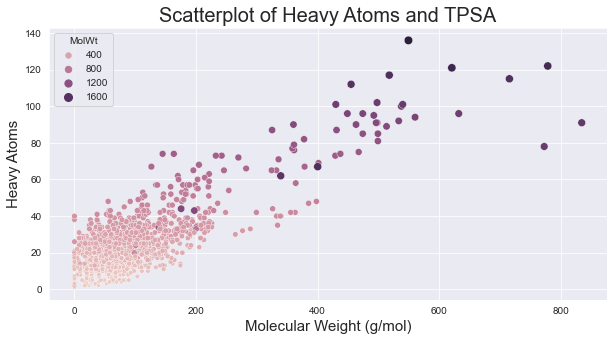

In [21]:
plt.figure(figsize=(10,5))
plt.title("Scatterplot of Heavy Atoms and TPSA", fontsize=20)
plt.ylabel("Heavy Atoms", fontsize=15)
plt.xlabel("Molecular Weight (g/mol)", fontsize=15)

sns.scatterplot(x="TPSA",y="HeavyAtoms", size="MolWt",hue="MolWt", data=df)


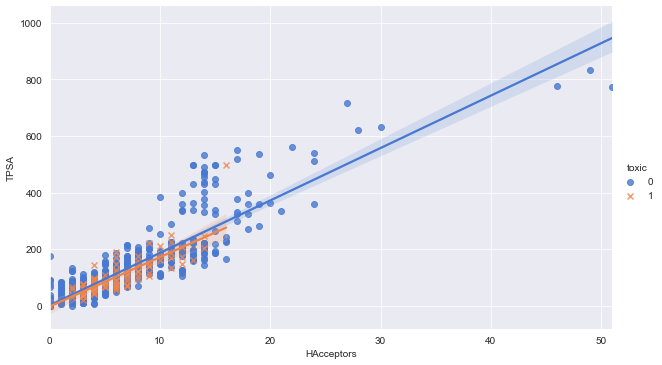

In [22]:
sns.lmplot(x="HAcceptors", 
                    y="TPSA", 
                    hue="toxic", 
                    data=df, 
                    markers=["o", "x"], 
                    height = 5, 
                    aspect = 1.7, 
                    palette="muted");


(0.0, 400.0)

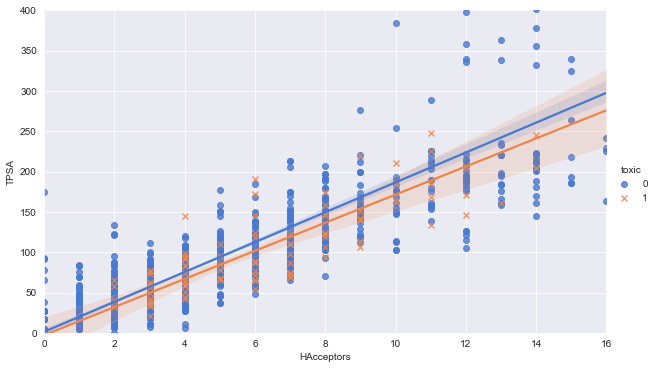

In [23]:
sns.lmplot(x="HAcceptors", y="TPSA", hue="toxic", data=df, markers=["o", "x"], 
              height = 5, aspect = 1.7, palette="muted");

plt.xlim([0, 16])
plt.ylim([0, 400])

In [24]:
df.columns

Index(['ID', 'smiles', 'toxic', 'FormalCharge', 'TPSA', 'MolWt', 'HeavyAtoms',
       'NHOH', 'HAcceptors', 'HDonors', 'Heteroatoms', 'AromaticRings',
       'SaturatedRings', 'AromaticOH', 'AromaticN', 'LogP'],
      dtype='object')

### Correlation and Heat Maps:

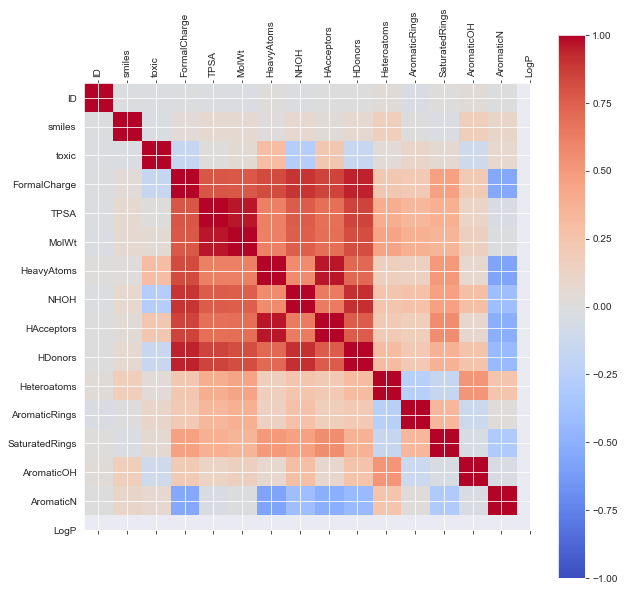

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr = df.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax1 = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(ax1)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [26]:
df[["TPSA", "MolWt", 
             "HeavyAtoms", "NHOH", "HAcceptors", 
             "HDonors", "AromaticRings", 
             "LogP", "AromaticN"]].corr()

TPSA     MolWt  HeavyAtoms      NHOH  HAcceptors   HDonors  \
TPSA           1.000000  0.785735    0.781096  0.823539    0.897188  0.849590   
MolWt          0.785735  1.000000    0.961451  0.609623    0.760046  0.686076   
HeavyAtoms     0.781096  0.961451    1.000000  0.614842    0.755139  0.688060   
NHOH           0.823539  0.609623    0.614842  1.000000    0.570108  0.963666   
HAcceptors     0.897188  0.760046    0.755139  0.570108    1.000000  0.633044   
HDonors        0.849590  0.686076    0.688060  0.963666    0.633044  1.000000   
AromaticRings  0.219956  0.397915    0.440247  0.160302    0.237554  0.210288   
LogP          -0.540883 -0.038773   -0.012894 -0.562992   -0.392125 -0.505401   
AromaticN      0.195574  0.122023    0.152883  0.072826    0.282243  0.085185   

               AromaticRings      LogP  AromaticN  
TPSA                0.219956 -0.540883   0.195574  
MolWt               0.397915 -0.038773   0.122023  
HeavyAtoms          0.440247 -0.012894   0.152883  
NHOH                0.160302 -0.562992   0.072826  
HAcceptors          0.237554 -0.392125   0.282243  
HDonors             0.210288 -0.505401   0.085185  
AromaticRings       1.000000  0.242826   0.522242  
LogP                0.242826  1.000000  -0.035307  
AromaticN           0.522242 -0.035307   1.000000

<AxesSubplot:>

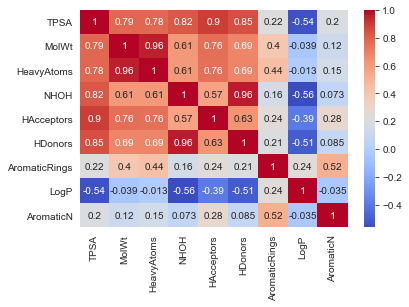

In [27]:
sns.heatmap(df[["TPSA", "MolWt", "HeavyAtoms", "NHOH", 
                         "HAcceptors", "HDonors", "AromaticRings", 
                         "LogP", "AromaticN"]].corr(), 
                         annot = True,  cmap="coolwarm")

<AxesSubplot:>

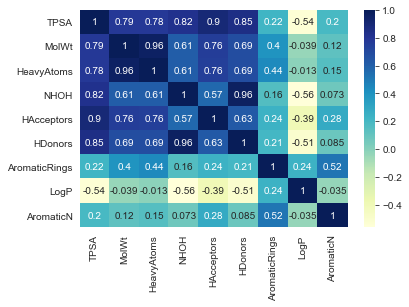

In [28]:
sns.heatmap(df[["TPSA", "MolWt", "HeavyAtoms", "NHOH", 
                         "HAcceptors", "HDonors", "AromaticRings", 
                         "LogP", "AromaticN"]].corr(), 
                         annot = True,  cmap="YlGnBu")

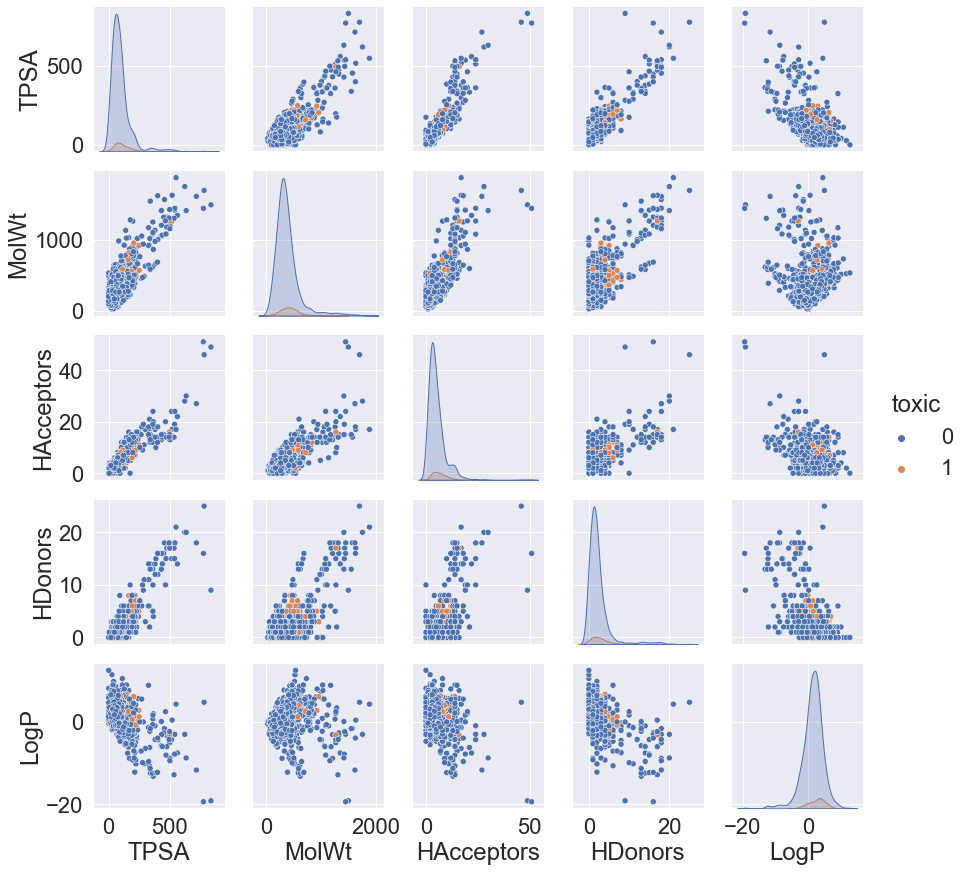

In [7]:
featuresOfInterest = ["TPSA", "MolWt", "HAcceptors", "HDonors", "toxic", "LogP"]
sns.set(font_scale=2)
sns.pairplot(df[featuresOfInterest], hue = "toxic", markers="o")

### 3D plots:

In [7]:
!pip install pillow

In [8]:
import plotly.express as px
fig = px.scatter_3d(df, x='TPSA', y='LogP', z='HeavyAtoms', color='toxic', opacity=0.7)
fig.update_traces(marker=dict(size=4))
fig.show()

### Sequential & Timeseries Data:

In [58]:
import wget
url_orchid = "https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta"
url_covid = "https://ftp.expasy.org/databases/uniprot/pre_release/covid-19.fasta"
filename = wget.download(url_orchid, out="../../datasets")
filename = wget.download(url_covid, out="../../datasets")

100% [..............................................................................] 81159 / 81159

In [59]:
from Bio import SeqIO
from Bio.SeqUtils import GC
gc_values_orchid = sorted(GC(rec.seq) for rec in SeqIO.parse("../../datasets/ls_orchid.fasta", "fasta"))
gc_values_covid = sorted(GC(rec.seq) for rec in SeqIO.parse("../../datasets/covid-19.fasta", "fasta"))

In [61]:
gc_values_covid

[4.545454545454546,
 4.761904761904762,
 6.557377049180328,
 6.818181818181818,
 7.216494845360825,
 9.183673469387756,
 9.30232558139535,
 9.67741935483871,
 9.75609756097561,
 10.0,
 10.526315789473685,
 10.725552050473187,
 11.407407407407407,
 11.455847255369928,
 11.62528216704289,
 11.627906976744185,
 11.978021978021978,
 12.0,
 12.077294685990339,
 12.32876712328767,
 12.831858407079647,
 12.867647058823529,
 12.975609756097562,
 13.031550068587105,
 13.043478260869565,
 13.043478260869565,
 13.09192200557103,
 13.095238095238095,
 13.178294573643411,
 13.503649635036496,
 13.574660633484163,
 13.57615894039735,
 13.610586011342155,
 13.636363636363637,
 13.636363636363637,
 13.654618473895582,
 13.81578947368421,
 13.934426229508198,
 13.934426229508198,
 14.049586776859504,
 14.108674928503337,
 14.121037463976945,
 14.150943396226415,
 14.269911504424778,
 14.285714285714286,
 14.43298969072165,
 14.444444444444445,
 14.49468085106383,
 14.516129032258064,
 14.54219030520646

In [60]:
import pylab

plt.figure(figsize=(10,5))
plt.title("Orchid FASTA Sequence GC%", fontsize=20)
plt.ylabel("GC Content %", fontsize=15)
plt.xlabel("Genes", fontsize=15)

pylab.plot(gc_values_orchid)

pylab.show()

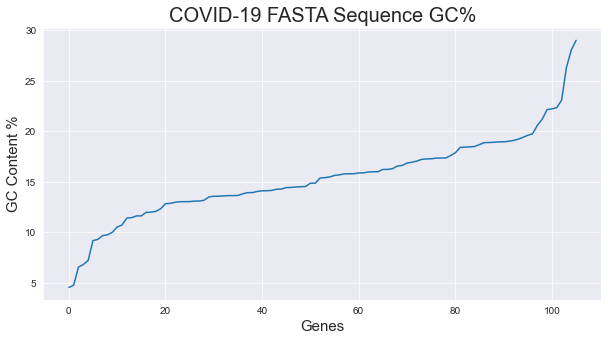

In [34]:
import pylab

plt.figure(figsize=(10,5))
plt.title("COVID-19 FASTA Sequence GC%", fontsize=20)
plt.ylabel("GC Content %", fontsize=15)
plt.xlabel("Genes", fontsize=15)

pylab.plot(gc_values_covid)

pylab.show()

In [35]:
dfts = pd.read_csv("../../datasets/dataset_pressure_ts.csv")
dfts.head()

Run Time  Pressure  Temperature
0  0.054857   2.75974    11.201299
1  0.082286   2.75974    11.201299
2  0.109714   2.75974    11.201299
3  0.137143   2.75974    11.201299
4  0.164571   2.75974    11.525974

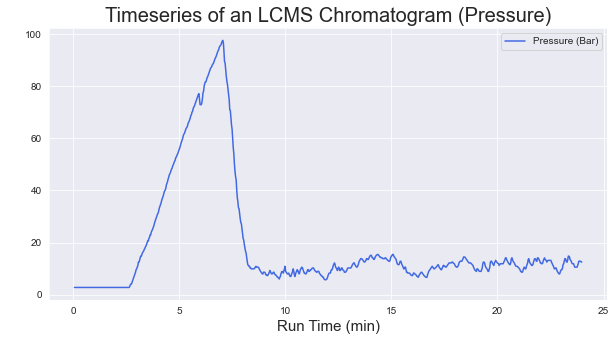

In [36]:
plt.figure(figsize=(10,5))
plt.title("Timeseries of an LCMS Chromatogram (Pressure)", fontsize=20)
plt.ylabel(" ", fontsize=15)
plt.xlabel("Run Time (min)", fontsize=15)

sns.lineplot(x="Run Time", y="Pressure",
                      data=dfts, color = "royalblue", 
                      label = "Pressure (Bar)");

In [65]:
plt.clf()

plt.figure(figsize=(10,5))
plt.title("Timeseries of an LCMS Chromatogram (Pressure & Temperature)", fontsize=20)
plt.ylabel(" ", fontsize=15)
plt.xlabel("Run Time (min)", fontsize=15)

ax1 = sns.lineplot(x="Run Time", y="Pressure",
                      data=dfts, color = "royalblue", 
                      label = "Pressure (Bar)");

ax2 = sns.lineplot(x="Run Time", y="Temperature",
                      data=dfts, color = "orange", 
                      label = "Temperature (C)");

### WordClouds:

In [9]:
from tika import parser
raw = parser.from_file("../../datasets/COVID19-CDC.pdf")
content = raw["content"]

2021-06-09 17:16:22,147 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [10]:
content

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nCOVID FactSheet\n\n\n    \n\ncdc.gov/coronavirus\n\nCS-317142-A \n\nSeek medical care immediately if someone has \nEmergency Warning Signs of COVID-19\n\n• Trouble breathing\n• Persistent pain or pressure in the chest\n• New confusion\n\n• Inability to wake or stay awake\n• Pale, gray, or blue-colored skin, lips, or nail \n\nbeds, depending on skin tone \n\nThis list is not all possible symptoms. Please call your healthcare provider for any other \nsymptoms that are severe or concerning to you.\n\nSymptoms can range from mild to severe illness, and appear 2–14 days after you \nare exposed to the virus that causes COVID-19. \n\nMuscle or body aches New loss of taste \nor smell\n\nVomiting or diarrhea\n\nCough, shortness of breath or difficulty breathing Fever or chills\n\nKnow the symptoms of COVID-19, which can include the following:\n\nhttps://www.cdc.gov/coronavirus/2019-n

In [11]:
def text_cleaner(text):
    text = re.sub('\W+',' ', text).lower()
    text = re.sub(r'\b\w{1,3}\b', '', text)
    text = re.sub(r' +', ' ', text)
    return text

words = text_cleaner(content)
words

' covid factsheet coronavirus 317142 seek medical care immediately someone emergency warning signs covid trouble breathing persistent pain pressure chest confusion inability wake stay awake pale gray blue colored skin lips nail beds depending skin tone this list possible symptoms please call your healthcare provider other symptoms that severe concerning symptoms range from mild severe illness appear days after exposed virus that causes covid muscle body aches loss taste smell vomiting diarrhea cough shortness breath difficulty breathing fever chills know symptoms covid which include following https coronavirus 2019 ncov symptoms testing symptoms html symptoms coronavirus covid http coronavirus https coronavirus 2019 ncov symptoms testing symptoms html '

In [12]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

### Sankey Diagrams:

In [44]:
import plotly.graph_objects as go

In [45]:
fig = go.Figure(data=[go.Sankey(node = dict(pad = 50, thickness = 10,
                 line = dict(color = "black", width = 0.5),
                 label = ["Drug Candidates", "Phase 1", "Phase 2",
                  "Phase 3", "Small Molecules", "Large Molecules"],
                 color = "blue"),
                 link = dict(
                 source = [0,  0, 0, 1,  2, 3, 1, 2, 3],
                 target = [1,  2, 3, 4,  4, 4, 5, 5, 5],
                  value = [15, 4, 2, 13, 3, 1, 2, 1, 1]
  ))])


In [46]:
fig.update_layout(title_text="Drug Candidates within a Company Pipeline", font_size=10)
fig.show()


### Visualizing Large Molecules:

In [47]:
import py3Dmol

lm = py3Dmol.view(query='pdb:6xmk', 
                           width=600,
                           height=600)

lm.setStyle({'stick':{'color':'spectrum'}})
lm

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [48]:
lm.setStyle({'cartoon':{'color':'spectrum'}})
lm

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [49]:
lm = py3Dmol.view(query='pdb:6xmk')

chA = {'chain':'A'}
chB = {'chain':'B'}

lm.setStyle(chA,{'cartoon': {'color':'spectrum'}}) 
lm.addSurface(py3Dmol.VDW, {'opacity':0.7, 'color':'white'}, chA)
lm.setStyle(chB,{'cartoon': {'color':'spectrum'}})
lm.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [50]:
lm = py3Dmol.view(query='pdb:5R84')
chA = {'chain':'A'}
lm.setStyle(chA,{'cartoon': {'color':'spectrum'}}) 
lm.addSurface(py3Dmol.VDW, {'opacity':0.7,
                           'color':'white'}, chA)

lm.setStyle(chB,{})
lm.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol